### Compare-kreport-taxonomic-profiles.ipynb

The goal of this Jupyter notebook is to facilitate easy comparisons of the taxonomic 
profiles of multiple metagenomic samples. These analyses require kraken-report 
(kreport) format files as inputs, and the analyses can be performed for any 
taxonomic rank in the kreport files (strain, species, genus, family, etc.). 

This notebook will also provide a summary of how many reads were assigned across taxonomic ranks, and the number of unique taxa assigned across taxonomic ranks.

Running the notebook requires the pandas, seaborn, and matplotlib Python libraries.

The kreport format is standard for many profilers (Kraken, Bracken, Centrifuge, MMSeqs2), and 
there are conversion scripts available for Metamaps, MetaPhlAn3, and MEGAN in:
https://github.com/PacificBiosciences/pb-metagenomics-tools/tree/master/pb-metagenomics-scripts
The PacBio MEGAN-LR workflows also produce kreport output formats:
https://github.com/PacificBiosciences/pb-metagenomics-tools/

To run your own analyses, you will need to edit the sample/file path information. 
You can generate counts at different taxnomic levels using the get_all_dfs() function.
There are examples of how to do this at the species and genus levels, along with
how to save the count tables and create/save stacked barplot figures. 

**To make high-quality plots, you will likely need to change aspects of the plot parameters. This will depend on the number of samples in your dataset as well as their microbial diversity. There are clear explanations in the species level analysis for how to change different plot parameters.**

Daniel Portik 

Bioinformatics Scientist, Pacific Biosciences

dportik@pacificbiosciences.com

05/2021

-------------------

# Table of Contents <a name="Top"></a>

+ [Entering Sample Information](#ESI)
+ [Functions for Interpreting kreports](#FIK)
+ [Read Utilization Analysis](#RUA)
    + [Plot Percent Reads per Rank](#PRR)
    + [Plot Unique Taxa per Rank](#PTR)
+ [Species Level Analysis](#SP)
    + [Creating dataframes](#SPDF)
    + [Stacked Barplots](#SPSB)
    + [Heatmaps](#SPH)
    + [Barplot with Absolute Counts](#SPAB)
+ [Genus Level Analysis](#GN)
    + [Creating dataframes](#GNDF)
    + [Stacked Barplots](#GNSB)
    + [Heatmaps](#GNH)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Enter sample and file information here <a name="ESI"></a>

In [2]:
# Provide the full path to each kreport to include below. 
# In this example we are using four files. The variable name
# is ideally what you want to call the sample in the analysis.

sc_100_1_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_100_1.diamond_megan.kreport.filtered.txt'
sc_100_1_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_100_1.diamond_megan.kreport.unfiltered.txt'
sc_100_2_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_100_2.diamond_megan.kreport.filtered.txt'
sc_100_2_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_100_2.diamond_megan.kreport.unfiltered.txt'
sc_100_3_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_100_3.diamond_megan.kreport.filtered.txt'
sc_100_3_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_100_3.diamond_megan.kreport.unfiltered.txt'
sc_5000_1_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_5000_1.diamond_megan.kreport.filtered.txt'
sc_5000_1_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_5000_1.diamond_megan.kreport.unfiltered.txt'
sc_5000_2_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_5000_2.diamond_megan.kreport.filtered.txt'
sc_5000_2_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_5000_2.diamond_megan.kreport.unfiltered.txt'
sc_5000_3_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_5000_3.diamond_megan.kreport.filtered.txt'
sc_5000_3_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/sc_5000_3.diamond_megan.kreport.unfiltered.txt'
mini_100_1_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/mini_100_3.diamond_megan.kreport.filtered.txt'
mini_100_1_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/mini_100_3.diamond_megan.kreport.unfiltered.txt'
mini_100_2_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/mini_100_4.diamond_megan.kreport.filtered.txt'
mini_100_2_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/mini_100_4.diamond_megan.kreport.unfiltered.txt'
mini_100_3_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/mini_100_5.diamond_megan.kreport.filtered.txt'
mini_100_3_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/mini_100_5.diamond_megan.kreport.unfiltered.txt'
mini_5000_1_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/mini_5000_1.diamond_megan.kreport.filtered.txt'
mini_5000_1_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/mini_5000_1.diamond_megan.kreport.unfiltered.txt'
mini_5000_2_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/mini_5000_2.diamond_megan.kreport.filtered.txt'
mini_5000_2_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240612_WGA_pool_allinone_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/mini_5000_2.diamond_megan.kreport.unfiltered.txt'
rap_3_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_3.diamond_megan.kreport.filtered.txt'
rap_3_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_3.diamond_megan.kreport.unfiltered.txt'
rap_6_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_6.diamond_megan.kreport.filtered.txt'
rap_6_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_6.diamond_megan.kreport.unfiltered.txt'
rap_12_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_12.diamond_megan.kreport.filtered.txt'
rap_12_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_12.diamond_megan.kreport.unfiltered.txt'
rap_25_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_25.diamond_megan.kreport.filtered.txt'
rap_25_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_25.diamond_megan.kreport.unfiltered.txt'
rap_50_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_50.diamond_megan.kreport.filtered.txt'
rap_50_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_50.diamond_megan.kreport.unfiltered.txt'
rap_100_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_100.diamond_megan.kreport.filtered.txt'
rap_100_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240503_102K_rap_6levels/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_100.diamond_megan.kreport.unfiltered.txt'
lig_25_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240419_102K_P_4levels_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_25.diamond_megan.kreport.unfiltered.txt'
lig_25_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240419_102K_P_4levels_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_25.diamond_megan.kreport.filtered.txt'
lig_50_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240419_102K_P_4levels_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_50.diamond_megan.kreport.unfiltered.txt'
lig_50_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240419_102K_P_4levels_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_50.diamond_megan.kreport.filtered.txt'
lig_100_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/20240419_102K_P_4levels_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_100.diamond_megan.kreport.unfiltered.txt'
lig_100_filtered = '/work/qd33/nanopore/taxonomy_profiling/20240419_102K_P_4levels_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/102K_P_100.diamond_megan.kreport.filtered.txt'
chunk_0_filtered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.0.diamond_megan.kreport.filtered.txt'
chunk_0_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.0.diamond_megan.kreport.unfiltered.txt'
chunk_1_filtered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.1.diamond_megan.kreport.filtered.txt'
chunk_1_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.1.diamond_megan.kreport.unfiltered.txt'
chunk_2_filtered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.2.diamond_megan.kreport.filtered.txt'
chunk_2_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.2.diamond_megan.kreport.unfiltered.txt'
chunk_3_filtered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.3.diamond_megan.kreport.filtered.txt'
chunk_3_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.3.diamond_megan.kreport.unfiltered.txt'
chunk_4_filtered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.4.diamond_megan.kreport.filtered.txt'
chunk_4_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.4.diamond_megan.kreport.unfiltered.txt'
chunk_5_filtered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.5.diamond_megan.kreport.filtered.txt'
chunk_5_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.5.diamond_megan.kreport.unfiltered.txt'
chunk_6_filtered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.6.diamond_megan.kreport.filtered.txt'
chunk_6_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.6.diamond_megan.kreport.unfiltered.txt'
chunk_7_filtered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.7.diamond_megan.kreport.filtered.txt'
chunk_7_unfiltered = '/work/qd33/nanopore/taxonomy_profiling/Duke_House_102K_P_pool_new/Taxonomic-Profiling-Minimap-Megan/9-kraken-mpa-reports/merged_ubam.7.diamond_megan.kreport.unfiltered.txt'



# Create a dictionary with string labels for the files as keys and the 
# a list for the values. The first item in the list is the file path, 
# and the second item should be the number of reads in the sample.
# The string labels will be used to label the samples in the resulting 
# tables and figures.

# Follow the format below for your own data.

file_dict = {"sc_100_1_filtered": [sc_100_1_filtered, 355058], 
             "sc_100_1_unfiltered": [sc_100_1_unfiltered, 355058],
             "sc_100_2_filtered": [sc_100_2_filtered, 753738],
             "sc_100_2_unfiltered": [sc_100_2_unfiltered, 753738],
             "sc_100_3_filtered": [sc_100_3_filtered, 660463], 
             "sc_100_3_unfiltered": [sc_100_3_unfiltered, 660463],
             "sc_5000_1_filtered": [sc_5000_1_filtered, 365127],
             "sc_5000_1_unfiltered": [sc_5000_1_unfiltered, 365127],
             "sc_5000_2_filtered": [sc_5000_2_filtered, 580444],
             "sc_5000_2_unfiltered": [sc_5000_2_unfiltered, 580444],
             "sc_5000_3_filtered": [sc_5000_3_filtered, 572891],
             "sc_5000_3_unfiltered": [sc_5000_3_unfiltered, 572891],
             "mini_100_1_filtered": [mini_100_1_filtered, 1572359],
             "mini_100_1_unfiltered": [mini_100_1_unfiltered, 1572359],
             "mini_100_2_filtered": [mini_100_2_filtered, 1804751],
             "mini_100_2_unfiltered": [mini_100_2_unfiltered, 1804751],
             "mini_100_3_filtered": [mini_100_3_filtered, 1804751],
             "mini_100_3_unfiltered": [mini_100_3_unfiltered, 1446431],
             "mini_5000_1_filtered": [mini_5000_1_filtered, 958181],
             "mini_5000_1_unfiltered": [mini_5000_1_unfiltered, 958181],
             "mini_5000_2_filtered": [mini_5000_2_filtered, 1179679],
             "mini_5000_2_unfiltered": [mini_5000_2_unfiltered, 1179679],
             "rap_3_filtered": [rap_3_filtered, 218611],
             "rap_3_unfiltered": [rap_3_unfiltered, 218611],
             "rap_6_filtered": [rap_6_filtered, 533987],
             "rap_6_unfiltered": [rap_6_unfiltered, 533987],
             "rap_12_filtered": [rap_12_filtered, 444138],
             "rap_12_unfiltered": [rap_12_unfiltered, 1135545],
             "rap_25_filtered": [rap_25_filtered, 1135545],
             "rap_25_unfiltered": [rap_25_unfiltered, 1771961],
             "rap_50_filtered": [rap_50_filtered, 1771961],
             "rap_50_unfiltered": [rap_50_unfiltered, 1771961],
             "rap_100_filtered": [rap_100_filtered, 2723138],
             "rap_100_unfiltered": [rap_100_unfiltered, 2723138],
             "lig_25_filtered": [lig_25_filtered, 877753],
             "lig_25_unfiltered": [lig_25_unfiltered, 877753],
             "lig_50_filtered": [lig_50_filtered, 4533505],
             "lig_50_unfiltered": [lig_50_unfiltered, 4533505],
             "lig_100_filtered": [lig_100_filtered, 7582962],
             "lig_100_unfiltered": [lig_100_unfiltered, 7582962],
             "chunk_0_filtered": [chunk_0_filtered, 2115089], 
             "chunk_0_unfiltered": [chunk_0_unfiltered, 2115089],
             "chunk_1_filtered": [chunk_1_filtered, 2113742], 
             "chunk_1_unfiltered": [chunk_1_unfiltered, 2113742],
             "chunk_2_filtered": [chunk_2_filtered, 2111123], 
             "chunk_2_unfiltered": [chunk_2_unfiltered, 2111123],
             "chunk_3_filtered": [chunk_3_filtered, 2113317], 
             "chunk_3_unfiltered": [chunk_3_unfiltered, 2113317],
             "chunk_4_filtered": [chunk_4_filtered, 2110390], 
             "chunk_4_unfiltered": [chunk_4_unfiltered, 2110390],
             "chunk_5_filtered": [chunk_5_filtered, 2110370], 
             "chunk_5_unfiltered": [chunk_5_unfiltered, 2110370],
             "chunk_6_filtered": [chunk_6_filtered, 2108799], 
             "chunk_6_unfiltered": [chunk_6_unfiltered, 2108799],
             "chunk_7_filtered": [chunk_7_filtered, 2115800], 
             "chunk_7_unfiltered": [chunk_7_unfiltered, 2115800]}

[Back to Top](#Top)

### Functions for interpreting kreports <a name="FIK"></a>

In [3]:
# The series of functions will create three types of pandas dataframes with taxon 
# counts for a specified taxonomic rank. The first dataframe contains absolute counts of 
# the taxa across all samples. It can be exported as a CSV file, and is also transformed to 
# make the second and third dataframes. These additional dataframes will contain the 
# absolute or normalized counts in a transposed format that is used to make the stacked
# barplot figures. Do not edit these functions!

def get_unique_taxa_at_rank(file_dict, rank):
    """
    Function to obtain all unique taxon names at a given rank 
    for a set of kreport files provided in file_dict. Returns 
    sorted list of unique taxon names.
    
    :param file_dict: dictionary with string label as key and file path as val
    :param rank: desired taxonomic rank (e.g., 'S1', 'S', 'G', 'F', etc.)
    :return: sorted list of unique taxon names at rank
    """
    # initiate empty set for taxon names
    taxon_set = set()
    
    # iterate over the file dictionary
    for key, val in file_dict.items():
        
        # create a pandas dataframe, remove whitespace to clean names column of kreport 
        df = pd.read_csv(val[0], sep = '\t', header=None, skipinitialspace=True,
                         names = ['proportion', 'cumulative_count', 'level_count', 'rank', 'taxid', 'name'])
        
        # get all unique taxon names at rank, add to set
        taxa = [t for t in (df.loc[df['rank'] == rank, 'name']).unique()]
        taxon_set.update(taxa)
    
    # return sorted list of taxon names
    return sorted(taxon_set)

def make_rank_dataframe(file_dict, rank):
    """
    Function to create a dataframe with taxon counts for 
    all kreport files in file_dict at a given taxonomic rank. 
    Returns pandas dataframe.
    
    :param file_dict: dictionary with string label as key and file path as val
    :param rank: desired taxonomic rank (e.g., 'S1', 'S', 'G', 'F', etc.)
    :return: pandas dataframe of taxon counts for specified rank
    """
    
    # initiate empty dictionary
    taxon_count_dict = {}
    
    # get taxon names to use for this rank
    taxon_list = get_unique_taxa_at_rank(file_dict, rank)
    
    # iterate over the file dictionary
    for key, val in file_dict.items():
        
        # add this sample as a key in the taxon count dictionary
        # value is an empty list that will be filled with taxon counts
        # in the order of the taxon_list
        taxon_count_dict[key] = []
        
        # make temp dataframe, remove whitespace to clean names column of kreport 
        df = pd.read_csv(val[0], sep = '\t', header=None, skipinitialspace=True, 
                         names = ['proportion', 'cumulative_count', 'level_count', 'rank', 'taxid', 'name'])
        
        # iterate over taxon names 
        for taxon in taxon_list:
            # make a subframe with matched name
            temp = df.loc[df['name'] == taxon]
            # add the cumulative count for the taxon name to the dict list
            # this should only be a single name, taking sum as easy way to get integer
            taxon_count_dict[key].append(temp.loc[df['rank'] == rank, 'cumulative_count'].sum())
    
    # create new dataframe from the dictionaries constructed
    df_taxa = pd.DataFrame.from_dict(taxon_count_dict)
    
    # add in a column with the taxon labels
    df_taxa.insert(0, 'Taxa', taxon_list)
    
    # return the taxon dataframe
    return df_taxa

def prepare_plotting_dfs(df, file_dict, sortby=list(file_dict.keys())):
    # transpose dataframe, sort counts, and add new column names
    df_transpose = df.sort_values(by=sortby, ascending=False).set_index('Taxa').transpose().rename_axis('Samples', axis=1)
    # normalize the species counts of each sample 100%
    df_transpose_norm = df_transpose.apply(lambda x: x*100/sum(x), axis=1)
    
    return df_transpose, df_transpose_norm

def get_all_dfs(file_dict, rank, sortby=list(file_dict.keys())):
    df_one = make_rank_dataframe(file_dict, rank)
    df_two, df_three = prepare_plotting_dfs(df_one, file_dict, sortby=sortby)
    return df_one, df_two, df_three
    
    
##############################################################################
# This function will count the number of reads assigned at each rank level,
# as well as the number of unique taxa occurring at each rank level.


def get_reads_to_ranks(file_dict):
    
    rank_read_count_dict, rank_taxa_count_dict = {}, {}
    
    for key, val in file_dict.items():
        # insert dict key with empty list
        rank_read_count_dict[key] = []
        rank_taxa_count_dict[key] = []

        # create dataframe
        df = pd.read_csv(val[0], sep = '\t', header=None,
                         names = ['proportion', 'cumulative_count', 'level_count', 'rank', 'taxid', 'name'])

        # iterate over desired ranks
        for r in ['S1', 'S', 'G', 'F', 'O', 'C', 'P', 'K']:

            # get number of reads assigned to all taxa at this rank level
            # we use level counts rather than cumulative counts here
            rank_readtotal = round((df.loc[df['rank'] == r, 'level_count'].sum() / val[1]) * 100, 1)
            # add to dictionary list
            rank_read_count_dict[key].append(rank_readtotal)

            # get number of unique names per rank
            rank_namecount = (df['rank'] == r).sum()
            # add to dictionary list
            rank_taxa_count_dict[key].append(rank_namecount)
            
        # convert dictionary to dataframe and insert new column in with rank names
    # do for read counts
    df_rank_read_count = pd.DataFrame.from_dict(rank_read_count_dict)
    df_rank_read_count.insert(0, 'Rank', ['S1', 'S', 'G', 'F', 'O', 'C', 'P', 'K'])

    # same for taxa counts
    df_rank_taxa_count = pd.DataFrame.from_dict(rank_taxa_count_dict)
    df_rank_taxa_count.insert(0, 'Rank', ['S1', 'S', 'G', 'F', 'O', 'C', 'P', 'K'])
    
    return df_rank_read_count, df_rank_taxa_count

[Back to Top](#Top)

# Read Utilization Analysis <a name="RUA"></a>

In [4]:
# Here we are attempting to understand how many reads were assigned at particular
# taxonomic ranks, and how many unique taxa were inferred at different ranks.

# Use the get_reads_to_ranks() function to return the dataframes for plotting.
# You won't need to change anything here.
df_rank_read_count, df_rank_taxa_count = get_reads_to_ranks(file_dict)

[Back to Top](#Top)

### Plot percent of reads assigned across ranks <a name="PRR"></a>

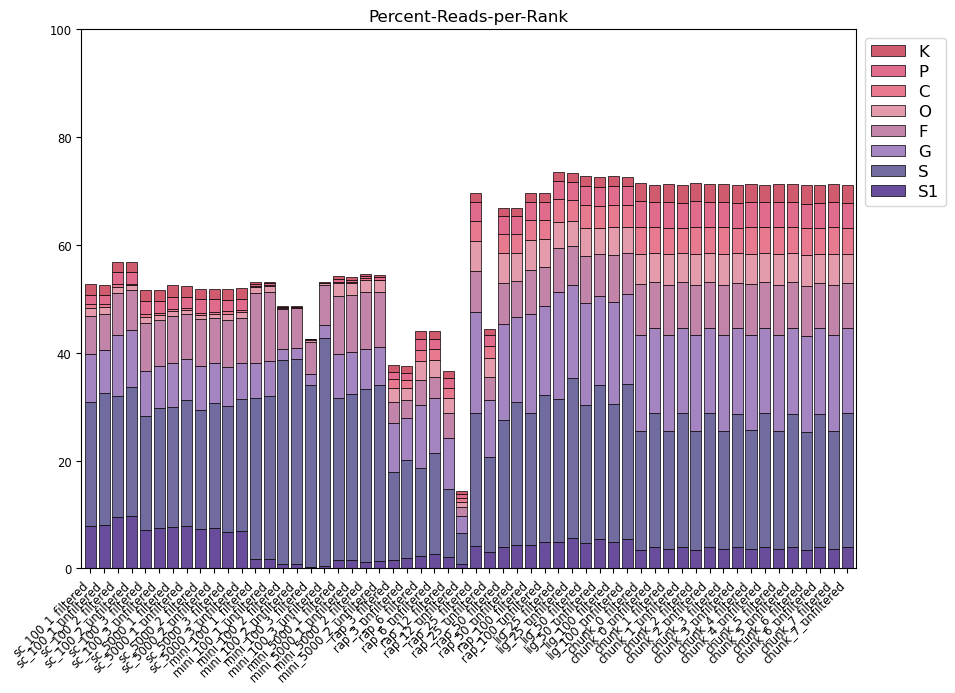

In [5]:
# Here you will need to potentially change some of the argument values 
# depending on the number of samples and taxa in your dataset.

# do a quick manipulation of the dataframe for correct plotting orientation
df_rank_read_count_it = df_rank_read_count.set_index('Rank').transpose().rename_axis('Sample', axis=1)


# Create the horizontal stacked bar plot using the pandas .plot.barh() function with the following args:

# stacked: controls whether or not to create a stacked barplot
# figsize: the dimensions of the figure, in (width, height)
# width: this controls the width of the bars, 1 = no separation between them, <1 puts spacing in
# color: sets the colors, we are setting a seaborn palette here
# fontsize: the size of sample labels (values = xx-small, x-small, small, medium, large, x-large, xx-large)
# edgecolor: controls the color of lines separating colors within bars, as well as bar outline
# linewidth: the line size for the edgecolor
# ylim: set limits for y-axis
custom_colors = [ '#6A4C9C', '#716C9F','#A585C1', '#C384A9', '#E49CAD','#E87A90','#E16B8C','#D05A6E']
ax = df_rank_read_count_it.plot.bar(stacked=True, figsize=(10,7), width=0.8, color=custom_colors, 
                                    fontsize='small', edgecolor='black', linewidth=0.5,
                                    title='Percent-Reads-per-Rank', ylim=(0,100))

# for vertical plot, we need to reverse the legend labels, start by getting these objects
handles, labels = ax.get_legend_handles_labels()

# add reversed(handles) and reversed(labels) to the legend arguments
# this controls the placement of the legend (bbox_to_anchor), as well as font (fontsize), 
# number of columns for labels (ncol), and spacing (labelspacing)
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1,1), 
          fontsize='large', ncol=1, labelspacing=0.3)

# adjust the appearance of the x-labels
ax.set_xticklabels(df_rank_read_count_it.index, rotation=45, ha='right')

# Use this to save the plot to file
ax.figure.savefig('Percent-Reads-per-Rank.pdf', bbox_inches='tight')

[Back to Top](#Top)

### Plot number of taxa assigned across ranks <a name="PTR"></a>

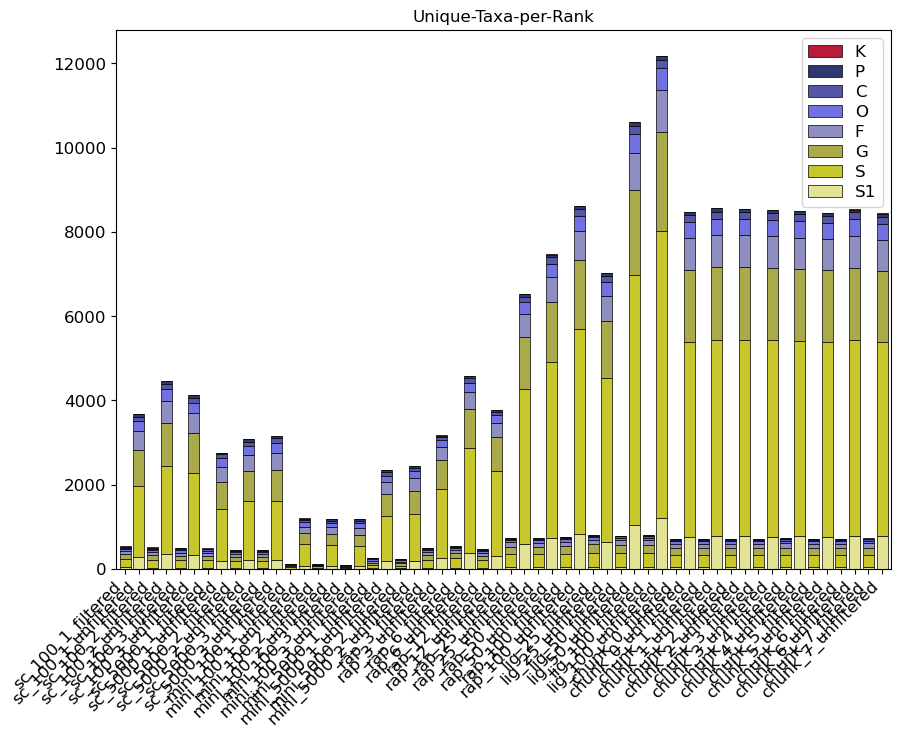

In [6]:
# Here you will need to potentially change some of the argument values 
# depending on the number of samples and taxa in your dataset.

# do a quick manipulation of the dataframe for correct plotting orientation
df_rank_taxa_count_it = df_rank_taxa_count.set_index('Rank').transpose().rename_axis('Sample', axis=1)



# Create the horizontal stacked bar plot using the pandas .plot.barh() function with the following args:

# stacked: controls whether or not to create a stacked barplot
# figsize: the dimensions of the figure, in (width, height)
# width: this controls the width of the bars, 1 = no separation between them, <1 puts spacing in
# color: sets the colors, we are setting a seaborn palette here
# fontsize: the size of sample labels (values = xx-small, x-small, small, medium, large, x-large, xx-large)
# edgecolor: controls the color of lines separating colors within bars, as well as bar outline
# linewidth: the line size for the edgecolor

ax = df_rank_taxa_count_it.plot.bar(stacked=True, figsize=(10,7), width=0.8, color=sns.color_palette("gist_stern_r",8), 
                                    fontsize='large', edgecolor='black', linewidth=0.5,
                                    title='Unique-Taxa-per-Rank')

# for vertical plot, we need to reverse the legend labels, start by getting these objects
handles, labels = ax.get_legend_handles_labels()

# add reversed(handles) and reversed(labels) to the legend arguments
# this controls the placement of the legend (bbox_to_anchor), as well as font (fontsize), 
# number of columns for labels (ncol), and spacing (labelspacing)
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1,1), 
          fontsize='large', ncol=1, labelspacing=0.3)

# adjust the appearance of the x-labels
ax.set_xticklabels(df_rank_taxa_count_it.index, rotation=45, ha='right')

# Use this to save the plot to file
ax.figure.savefig('Unique-Taxa-per-Rank.pdf', bbox_inches='tight')

[Back to Top](#Top)

# Analysis at the SPECIES level <a name="SP"></a>

### SPECIES: Create species-level dataframes <a name="SPDF"></a>

In [12]:
# This demonstrates how to use the main function get_all_dfs() to create 
# the comparison dataframes. We will start the demonstration for the 
# species level.

# To generate the dataframes, we use the following function: 
# get_all_dfs(file_dict, rank, sortby='Name')
#    the first positional argument is file_dict (leave unchanged)
#    the second positional argument is the rank desired ('S1', 'S', 'G', 'F', etc.)
#    the optional argument sortby can be used to specify one of the samples to sort 
#        abundances by, which must be a key name in file_dict
# The function returns three dataframes, so three variable names must be specified

# Here is the basic usage to get dataframes for species level taxa:
df_sp, df_sp_plot, df_sp_plot_norm = get_all_dfs(file_dict, 'P')
# In the above example, we labeled the three dataframes returned by the function as:
# df_sp, df_sp_plot, and df_sp_plot_norm.

# Below is the same example but with sorting by abundances in sample "CID_139445", un-hash to run:
# df_sp, df_sp_plot, df_sp_plot_norm = get_all_dfs(file_dict, 'S', sortby="CID_139445")
# Make sure if you use the optional argument that you specify a label name/key in the file_dict.

In [13]:
# Preview the first type of dataframe. Here, samples are the columns and taxa form the rows. 
df_sp.head()

,Taxa,sc_100_1_filtered,sc_100_1_unfiltered,sc_100_2_filtered,sc_100_2_unfiltered,sc_100_3_filtered,sc_100_3_unfiltered,sc_5000_1_filtered,sc_5000_1_unfiltered,sc_5000_2_filtered,...,chunk_3_filtered,chunk_3_unfiltered,chunk_4_filtered,chunk_4_unfiltered,chunk_5_filtered,chunk_5_unfiltered,chunk_6_filtered,chunk_6_unfiltered,chunk_7_filtered,chunk_7_unfiltered
0,Acanthocephala,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Acidobacteriota,339,339,314,312,378,376,84,83,178,...,52138,52124,51934,51914,51857,51836,51253,51239,52179,52165
2,Actinomycetota,124,121,135,134,155,152,34,34,0,...,31806,31348,31581,31117,31413,30896,31287,30805,31598,31126
3,Annelida,0,0,0,2,0,0,0,1,0,...,0,3,0,3,0,4,0,4,0,2
4,Apicomplexa,35,35,0,40,0,43,0,17,0,...,0,45,0,40,0,35,0,36,0,50


In [14]:
# Preview the second dataframe. Notice it is a transposed version of the first one.
# Here, taxa are columns and samples are the rows.
df_sp_plot.head()

Samples,Bacteroidota,Pseudomonadota,Bacillota,Spirochaetota,Arthropoda,Ascomycota,Thermodesulfobacteriota,Chordata,Acidobacteriota,Streptophyta,...,Candidatus Neomarinimicrobiota,Gastrotricha,Calditrichota,Candidatus Zixiibacteriota,Acanthocephala,Pisuviricota,Candidatus Coatesiibacteriota,Endomyxa,Brachiopoda,Duplornaviricota
sc_100_1_filtered,61394,60011,38845,4108,2410,1202,912,657,339,234,...,0,0,0,0,0,0,0,0,0,0
sc_100_1_unfiltered,61347,59852,38772,4108,2416,1193,923,657,339,234,...,0,0,0,0,0,0,0,0,0,0
sc_100_2_filtered,178484,101742,97483,16186,4567,1734,1085,833,314,470,...,0,0,0,0,0,0,0,0,0,0
sc_100_2_unfiltered,178319,101485,97293,16186,4573,1723,1118,833,312,470,...,0,0,0,0,0,0,0,0,0,0
sc_100_3_filtered,159013,86029,47869,15250,3578,1903,1286,895,378,424,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Preview the third dataframe. This is the same format as above,
# but the values have been normalized so counts for each sample 
# total to 100. 
df_sp_plot_norm.head()

Samples,Bacteroidota,Pseudomonadota,Bacillota,Spirochaetota,Arthropoda,Ascomycota,Thermodesulfobacteriota,Chordata,Acidobacteriota,Streptophyta,...,Candidatus Neomarinimicrobiota,Gastrotricha,Calditrichota,Candidatus Zixiibacteriota,Acanthocephala,Pisuviricota,Candidatus Coatesiibacteriota,Endomyxa,Brachiopoda,Duplornaviricota
sc_100_1_filtered,35.879005,35.070772,22.701240,2.400739,1.408418,0.702456,0.532978,0.383955,0.198114,0.136751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sc_100_1_unfiltered,35.857405,34.983576,22.662287,2.401132,1.412155,0.697310,0.539495,0.384017,0.198146,0.136773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sc_100_2_filtered,44.061529,25.116582,24.065182,3.995764,1.127434,0.428065,0.267849,0.205639,0.077516,0.116027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sc_100_2_unfiltered,44.011778,25.048005,24.013358,3.994945,1.128684,0.425262,0.275939,0.205597,0.077006,0.116003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sc_100_3_filtered,49.956331,27.027307,15.038768,4.791017,1.124083,0.597856,0.404016,0.281178,0.118754,0.133206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SPECIES: Saving the dataframes to files

In [23]:
# to save any of the above dataframes, use the df.to_csv() method

# for the df_sp, we don't want to include the index (which is just integers)
# we can also specify tab-delimited using the sep argument:
df_sp.to_csv("Species-Absolute-Abundance-Counts.txt", index=False, sep='\t')

# for the df_sp_plot and df_sp_plot_norm dataframes, keep the index (which is the sample names):
df_sp_plot.to_csv("Species-Absolute-Abundance-Counts-Transposed.txt", sep='\t')


[Back to Top](#Top)

### SPECIES stacked barplots <a name="SPSB"></a>

#### Make a HORIZONTAL stacked barplot using the NORMALIZED COUNT dataframe. 

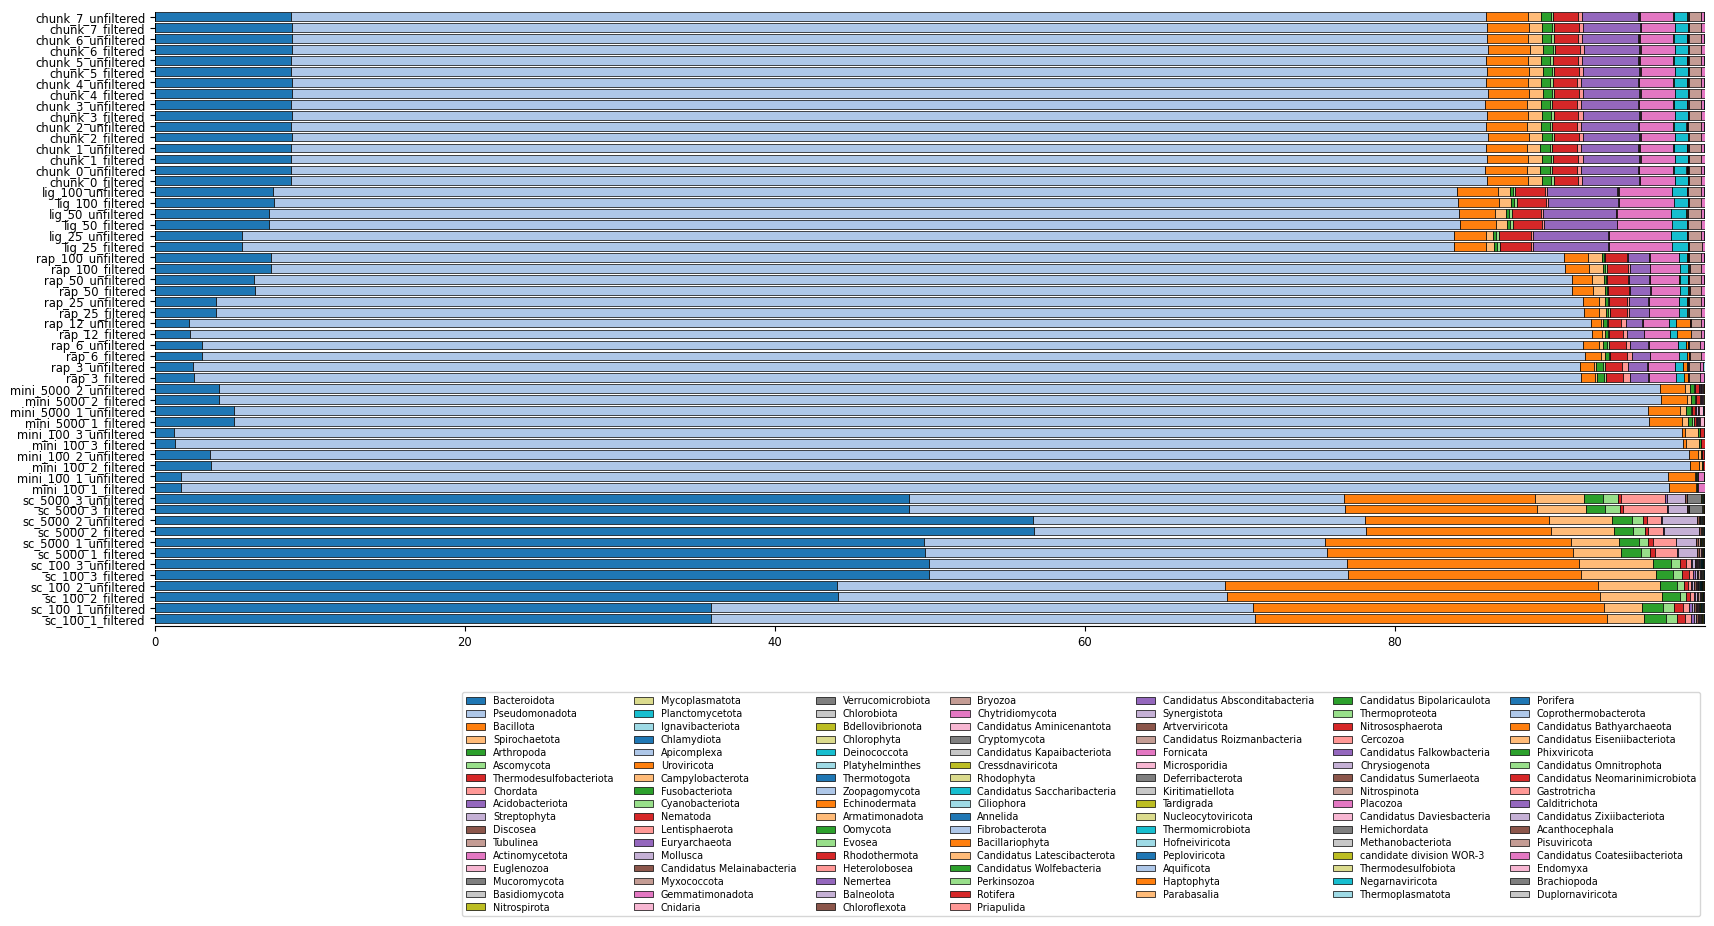

In [16]:
# Here you will need to potentially change some of the argument values 
# depending on the number of samples and taxa in your dataset.

# Create the horizontal stacked bar plot using the pandas .plot.barh() function with the following args:

# stacked: controls whether or not to create a stacked barplot
# figsize: the dimensions of the figure, in (width, height)
# width: this controls the width of the bars, 1 = no separation between them, <1 puts spacing in
# color: sets the colors, we refer to pal which was set above
# fontsize: the size of sample labels (values = xx-small, x-small, small, medium, large, x-large, xx-large)
# edgecolor: controls the color of lines separating colors within bars, as well as bar outline
# linewidth: the line size for the edgecolor

ax = df_sp_plot_norm.plot.barh(stacked=True, figsize=(20,8), width=0.8, 
                               color=sns.color_palette("tab20"), fontsize='small', 
                               edgecolor='black', linewidth=0.5)

# these commands eliminate the bounding box for the barplot
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# this controls the placement of the legend (bbox_to_anchor), as well as font (fontsize), 
# number of columns for labels (ncol), and spacing (labelspacing)
ax.legend(bbox_to_anchor=(1,-0.10), fontsize='x-small', ncol=7, labelspacing=0.3)

# You can save the plot using the following:
ax.figure.savefig('Species-Abundances-Normalized-Horizontal.pdf', bbox_inches='tight')

[Back to Top](#Top)

#### Make a VERTICAL stacked barplot using the NORMALIZED COUNT dataframe. 

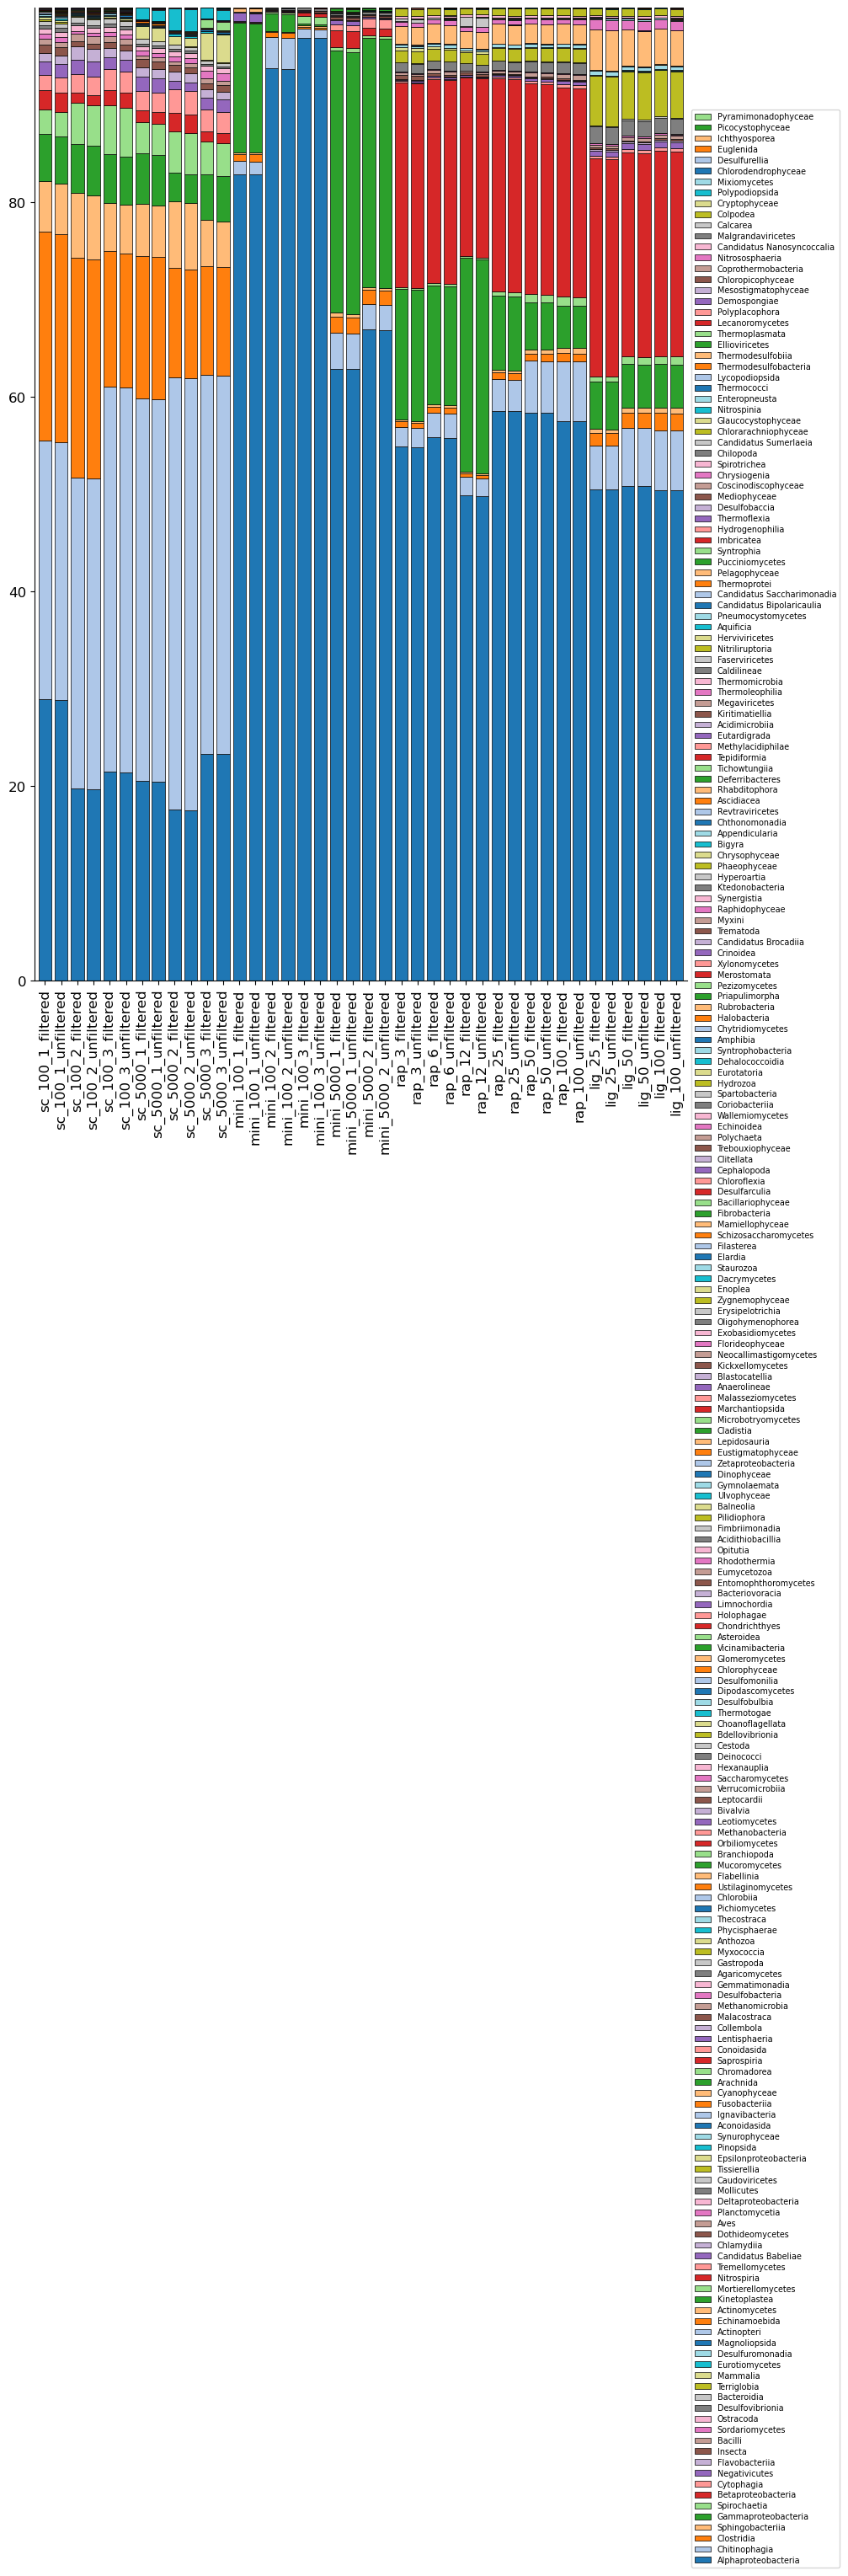

In [16]:
# Here you will need to potentially change some of the argument values 
# depending on the number of samples and taxa in your dataset.

# Create the vertical stacked bar plot using the pandas .plot.bar() function with the following args:

# stacked: controls whether or not to create a stacked barplot
# figsize: the dimensions of the figure, in (width, height)
# width: this controls the width of the bars, 1 = no separation between them, <1 puts spacing in
# color: sets the colors, we refer to pal which was set above
# fontsize: the size of sample labels (values = xx-small, x-small, small, medium, large, x-large, xx-large)
# edgecolor: controls the color of lines separating colors within bars, as well as bar outline
# linewidth: the line size for the edgecolor

ax = df_sp_plot_norm.plot.bar(stacked=True, figsize=(10,15), width=0.8, 
                              color=sns.color_palette("tab20"), fontsize='large', 
                              edgecolor='black', linewidth=0.5)

# these commands eliminate the bounding box for the barplot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# for vertical plot, we need to reverse the legend labels, start by getting these objects
handles, labels = ax.get_legend_handles_labels()

# and add reversed(handles) and reversed(labels) to the legend arguments
# this controls the placement of the legend (bbox_to_anchor), as well as font (fontsize), 
# number of columns for labels (ncol), and spacing (labelspacing)
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1,0.9), 
          fontsize='x-small', ncol=1, labelspacing=0.3)

# You can save the above plot using the following:
ax.figure.savefig('Species-Abundances-Normalized-Vertical.pdf', bbox_inches='tight')

[Back to Top](#Top)

### SPECIES heatmaps <a name="SPH"></a>

#### Make a HORIZONTAL heatmap using the NORMALIZED COUNT dataframe. 

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (22).

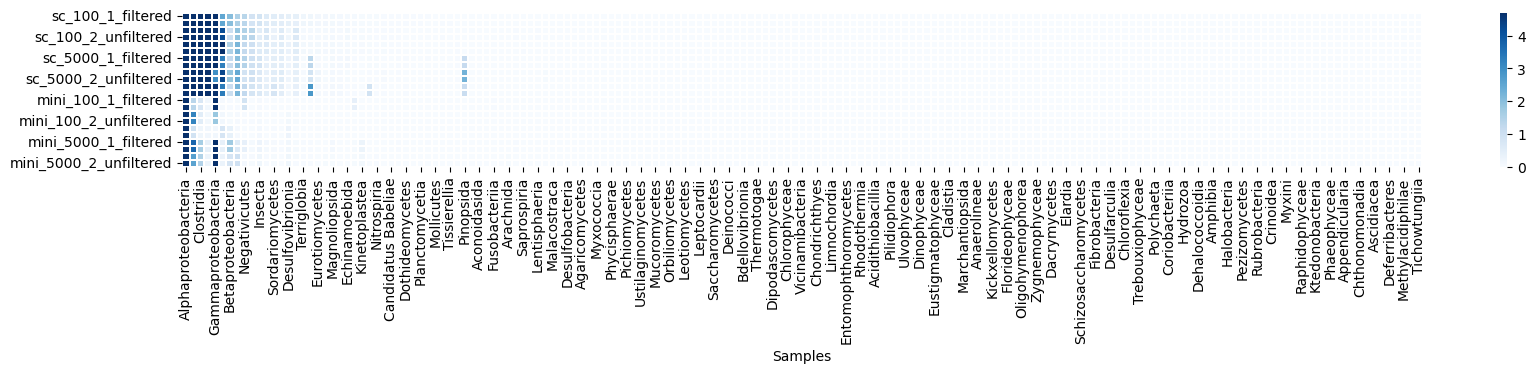

In [17]:
# Here you will need to potentially change some of the argument values 
# depending on the number of samples and taxa in your dataset.

# set the size of the figure first
fig, ax = plt.subplots(figsize=(20, 2))

# use seaborn to generate the heatmap, set color to Blues
sns.heatmap(df_sp_plot_norm, cmap="Blues", linewidth=0.1, robust=True)

# these commands clean up aspects of the tick labels
ax.set_yticklabels(df_sp_plot_norm.index, rotation=0, ha='right', fontsize='medium')
ax.set_xticklabels(df_sp_plot_norm, rotation=45, ha='right', fontsize='x-small')

# show the plot
plt.show()

# You can save the plot using the following:
ax.figure.savefig('Species-Heatmap-Horizontal.pdf', bbox_inches='tight')

[Back to Top](#Top)

#### Make a VERTICAL heatmap using the NORMALIZED COUNT dataframe.

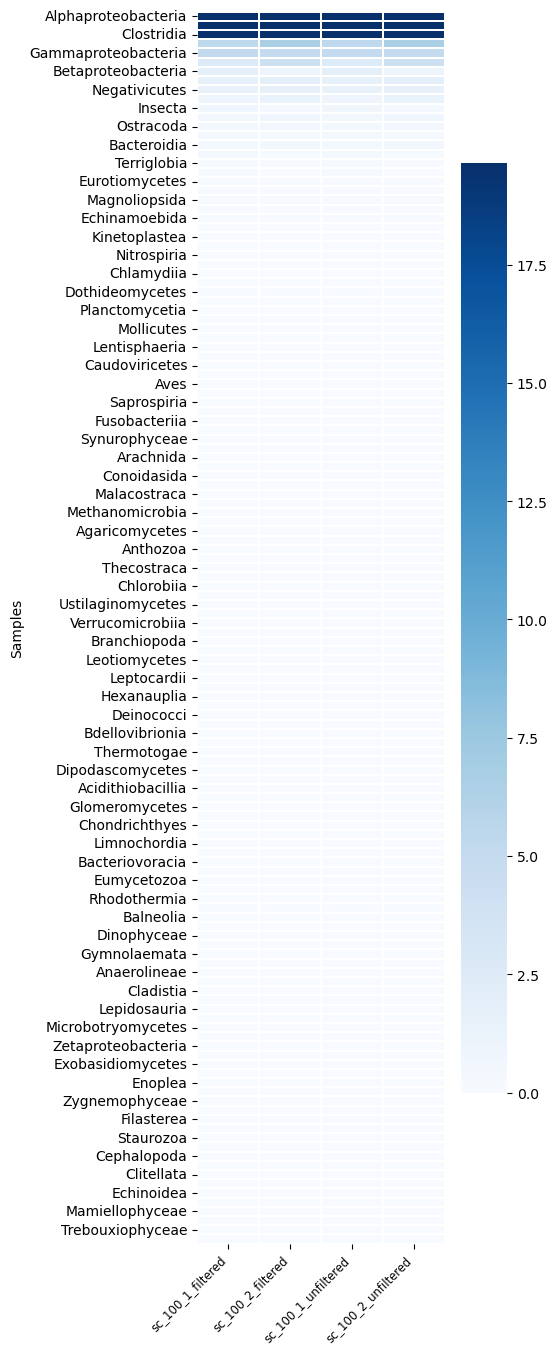

In [114]:
# Here you will need to potentially change some of the argument values 
# depending on the number of samples and taxa in your dataset.

# set the size of the figure first
fig, ax = plt.subplots(figsize=(4, 16))

# use seaborn to generate the heatmap, set color to Blues
sns.heatmap(df_sp_plot_norm.transpose(), cmap="Blues", linewidth=0.1, robust=True)

# these commands clean up aspects of the tick labels
ax.set_xticklabels(df_sp_plot_norm.transpose(), rotation=45, ha='right', fontsize='small')

# show the plot
plt.show()

# You can save the plot using the following:
ax.figure.savefig('Species-Heatmap-Vertical.pdf', bbox_inches='tight')

[Back to Top](#Top)

### Make a HORIZONTAL stacked barplot using the ABSOLUTE COUNT dataframe. <a name="SPAB"></a>

This is probably not a very useful plot if your samples have different numbers of reads, but it is provided as a demonstration.

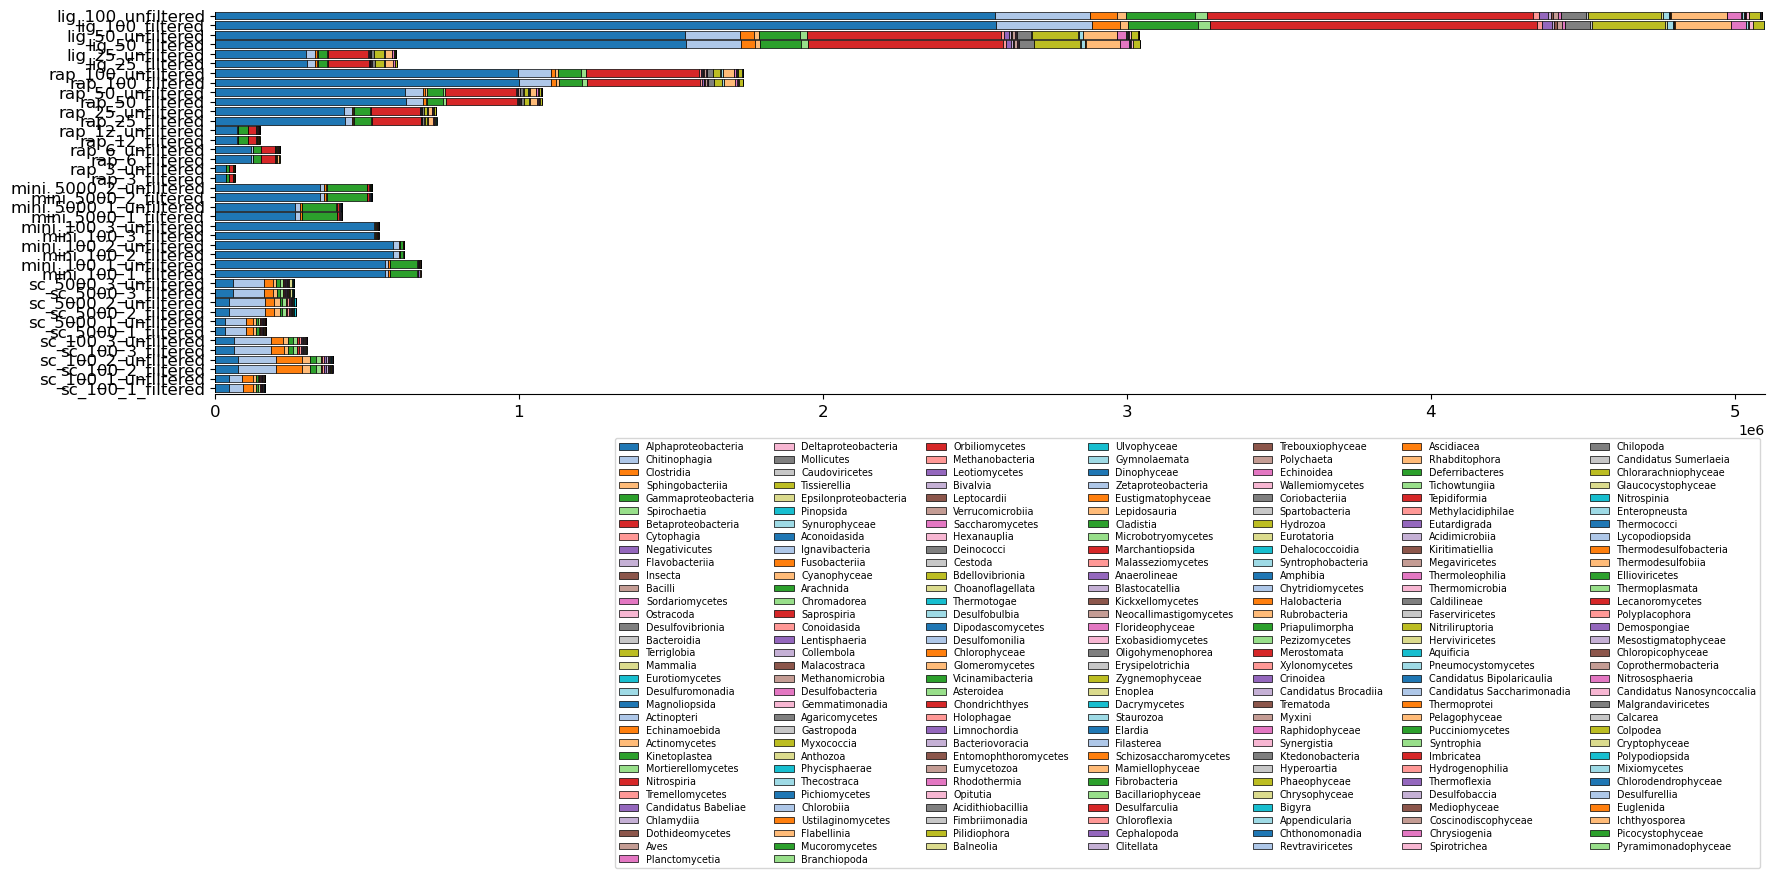

In [17]:
# In this plot, we don't expect the stacked bars to be the same lengths.

# All the same arguments are used, but we use the df_sp_plot dataframe instead
# of the df_sp_plot_norm dataframe

pal = sns.color_palette("tab20")
ax = df_sp_plot.plot.barh(stacked=True, figsize=(20,5), width=0.8, 
                          color=sns.color_palette("tab20"), fontsize='large', 
                          edgecolor='black', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(bbox_to_anchor=(1,-0.10), fontsize='x-small', ncol=7, labelspacing=0.3)

# You can save the above plot using the following:
ax.figure.savefig('Species-Abundances-Absolute-Horizontal.pdf', bbox_inches='tight')

[Back to Top](#Top)

# Analysis at the GENUS level <a name="GN"></a>

### Create a taxon dataframe for the GENUS level <a name="GNDF"></a>

In [ ]:
# Do the same thing, but for the genus level

# here is the basic usage to get dataframes for genus level taxa
df_gn, df_gn_plot, df_gn_plot_norm = get_all_dfs(file_dict, 'G')


In [ ]:
# Preview the first dataframe. Here, samples are the columns and taxa form the rows.
df_gn.head()

In [ ]:
# Save genus counts to csv
df_gn.to_csv("Genus-Absolute-Abundance-Counts.txt", index=False, sep='\t')

[Back to Top](#Top)

### GENUS stacked barplots <a name="GNSB"></a>

#### Make a HORIZONTAL stacked barplot using the NORMALIZED COUNT dataframe.

In [ ]:
# Here you will need to potentially change some of the argument values 
# depending on the number of samples and taxa in your dataset.

ax = df_gn_plot_norm.plot.barh(stacked=True, figsize=(20,5), width=0.8, 
                               color=sns.color_palette("tab20"), fontsize='large', 
                               edgecolor='black', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(bbox_to_anchor=(1,-0.10), fontsize='small', ncol=7, labelspacing=0.1)
ax.figure.savefig('Genus-Abundances-Normalized-Horizontal.pdf', bbox_inches='tight')

[Back to Top](#Top)

#### Make a VERTICAL stacked barplot using the NORMALIZED COUNT dataframe. 

In [ ]:
# Here you will need to potentially change some of the argument values 
# depending on the number of samples and taxa in your dataset.

ax = df_gn_plot_norm.plot.bar(stacked=True, figsize=(5,15), width=0.8, 
                              color=sns.color_palette("tab20"), fontsize='large', 
                              edgecolor='black', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1,0.9), 
          fontsize='small', ncol=1, labelspacing=0.3)
ax.figure.savefig('Genus-Abundances-Normalized-Vertical.pdf', bbox_inches='tight')

[Back to Top](#Top)

### GENUS heatmaps <a name="GNH"></a>

#### Make a HORIZONTAL heatmap using the NORMALIZED COUNT dataframe. <a name="GNHH"></a>

In [ ]:
# Here you will need to potentially change some of the argument values 
# depending on the number of samples and taxa in your dataset.

fig, ax = plt.subplots(figsize=(20, 2))
sns.heatmap(df_gn_plot_norm, cmap="Blues", linewidth=0.1, robust=True)
ax.set_yticklabels(df_gn_plot_norm.index, rotation=0, ha='right', fontsize='medium')
ax.set_xticklabels(df_gn_plot_norm, rotation=45, ha='right', fontsize='small')
plt.show()
ax.figure.savefig('Genus-Heatmap-Horizontal.pdf', bbox_inches='tight')

[Back to Top](#Top)

#### Make a VERTICAL heatmap using the NORMALIZED COUNT dataframe. <a name="GNVH"></a>

In [ ]:
# Here you will need to potentially change some of the argument values 
# depending on the number of samples and taxa in your dataset.

fig, ax = plt.subplots(figsize=(4, 10))
sns.heatmap(df_gn_plot_norm.transpose(), cmap="Blues", linewidth=0.1, robust=True)
ax.set_xticklabels(df_gn_plot_norm.transpose(), rotation=45, ha='right', fontsize='small')
plt.show()
ax.figure.savefig('Genus-Heatmap-Vertical.pdf', bbox_inches='tight')

[Back to Top](#Top)